# Network wide neuromodulation

In [ ]:
!echo $PATH | grep -q "$HOME/.local/bin" && echo .local/bin OK || echo .local/bin FAILED
!which nrnivmodl >/dev/null && echo Neuron OK || echo Neuron FAILED
!python3 -c 'import neuron' && echo PyNeuron OK || echo PyNeuron FAILED

In [ ]:
%cd ../../Snudda/
!git checkout gpcr_modulation
!pip install --upgrade -e .[dev]

In [ ]:
%cd ../BasalGangliaExperiments/Neuromodulation-software/

In [1]:
import pathlib
path = pathlib.Path("Experiment-Simulation")
path.mkdir(parents=True, exist_ok=True)
%cd Experiment-Simulation

/home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation-software/local/Experiment-Simulation


# Acetylcholine-Dopamine network modulation

# Dopamine network modulation

In [3]:
from project_wide.neuromodulationInit import neuromodulationInit
from collections import OrderedDict
import os
os.environ["SNUDDA_DATA"] = '/home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation-software/network_parameters/'

neurons_dir = os.path.abspath('../../network_parameters/neurons/')
print(neurons_dir)
network_path = 'Dopamine-receptor-network'
config_name= network_path + "/network-config.json"


cnc = neuromodulationInit(config_file=config_name,random_seed=12345)

cnc.define_striatum_neuromodulation(num_dSPN=10,num_iSPN=10,num_FS=1,volume_type="cube",neurons_dir=neurons_dir)  
dirName = os.path.dirname(config_name)

if not os.path.exists(dirName):
    os.makedirs(dirName)

cnc.write_json(config_name)


/home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation-software/network_parameters/neurons
${DATA}
Using cube for striatum
Adding neurons: FSN from dir /home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation-software/network_parameters/neurons/striatum/fs
Adding neurons: dSPN from dir /home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation-software/network_parameters/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation-software/network_parameters/neurons/striatum/ispn
Writing Dopamine-receptor-network/network-config.json


In [4]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.parse_config()
sp.write_data()

In [5]:
from snudda.detect import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 48/100 (21 neurons)
Processing hyper voxel : 45/100 (21 neurons)
Processing hyper voxel : 49/100 (21 neurons)
Processing hyper voxel : 29/100 (21 neurons)
Processing hyper voxel : 28/100 (18 neurons)
Processing hyper voxel : 44/100 (16 neurons)
Processing hyper voxel : 25/100 (15 neurons)
Processing hyper voxel : 24/100 (11 neurons)
Processing hyper voxel : 53/100 (9 neurons)
Processing hyper voxel : 52/100 (8 neurons)
Processing hyper voxel : 69/100 (8 neurons)
Processing hyper voxel : 50/100 (7 neurons)
Processing hyper voxel : 46/100 (4 neurons)
Processing hyper voxel : 33/100 (4 neurons)
Processing hyper voxel : 65/100 (4 neurons)
Processing hyper voxel : 30/100 (3 neurons)
Processing hyper voxel : 32/100 (3 neurons)
Processing hyper voxel : 68/100 (3 neurons)
Processing hyper voxel : 60/100 (1 neurons)
Processing hyper voxel : 8/100 (1 neurons)
Processing hyper voxel : 40/100 (1 neurons)
Processing 

In [6]:
from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

SnuddaPrune is now available when doing import snudda.detect
Please update to `from snudda.detect import SnuddaPrune`
Read 4440 out of total 4440 synapses


Loading 21 neurons with 215 synapses and 0 gap junctions


/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/snudda/plotting/plot_network.py:41: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


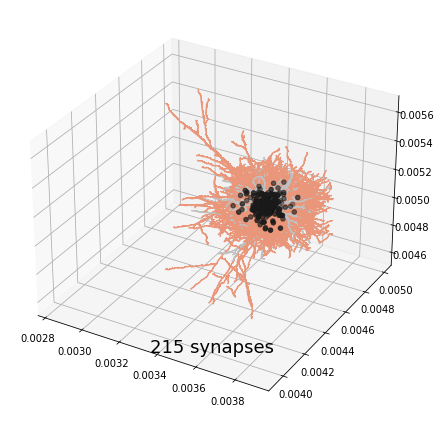

In [7]:
from snudda.plotting.plot_network import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)